**IPL Data Analysis using EDA**

In [3]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing the dataset
data = pd.read_csv("matches.csv")
data.head(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
#rows and columns in the dataset
data.shape

(756, 18)

In [6]:
data.info

<bound method DataFrame.info of         id    Season  ...         umpire2                  umpire3
0        1  IPL-2017  ...        NJ Llong                      NaN
1        2  IPL-2017  ...          S Ravi                      NaN
2        3  IPL-2017  ...       CK Nandan                      NaN
3        4  IPL-2017  ...   C Shamshuddin                      NaN
4        5  IPL-2017  ...             NaN                      NaN
..     ...       ...  ...             ...                      ...
751  11347  IPL-2019  ...        O Nandan                   S Ravi
752  11412  IPL-2019  ...     Nitin Menon                Ian Gould
753  11413  IPL-2019  ...             NaN                      NaN
754  11414  IPL-2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415  IPL-2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [7]:
#Names of all the columns
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Data Pre-processing**

In [8]:
#Finding NaN values
data.isna().any()

id                 False
Season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [9]:
#Description of Dataset
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [10]:
#How many matches (in total) were played according to the dataset?
data['id'].count()

756

In [11]:
#How many IPL seasons are present here in this dataset?
data['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [12]:
#Which IPL team won by scoring the maximum runs?
data.iloc[data['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [13]:
#Which IPL team won by consuming maximum wickets?
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [14]:
#Which IPL team won by taking minimum wickets?
data.iloc[data['win_by_wickets'].idxmin()]

id                                                         1
Season                                              IPL-2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

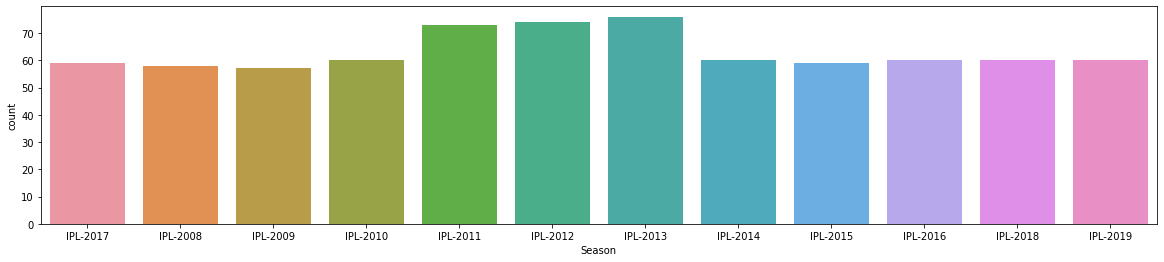

In [15]:
#Which IPL season consisted of the highest number of matches ever played?
fig_dims = (20,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Season', ax=ax, data=data)
plt.show()

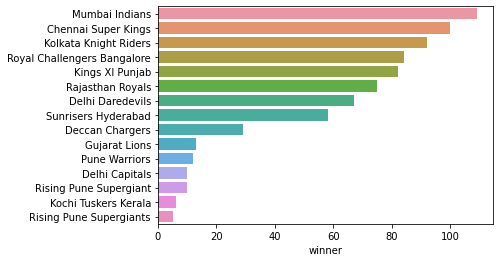

In [16]:
#which is the most successful IPL team with all the data at hand?
data1 = data.winner.value_counts()
sns.barplot(y = data1.index, x = data1)

In [17]:
#What is the probability of winning a match if the toss was won?
probability_of_win = data['toss_winner'] == data['winner']
probability_of_win.groupby(probability_of_win).size()

False    363
True     393
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


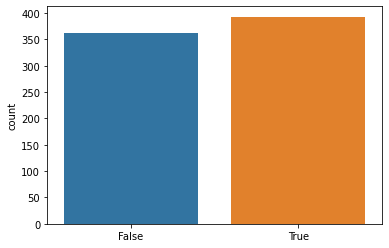

In [18]:
sns.countplot(probability_of_win)

In [19]:
#Setting a higher row width
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [20]:
#Highest wins by teams per season
data.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
          Kolkata Knight Riders           6
          Royal Challengers Bangalore     4
          Deccan Chargers                 2
IPL-2009  Delhi Daredevils               10
          Deccan Chargers                 9
          Royal Challengers Bangalore     9
          Chennai Super Kings             8
          Kings XI Punjab                 7
          Rajasthan Royals                6
          Mumbai Indians                  5
          Kolkata Knight Riders           3
IPL-2010  Mumbai Indians                 11
          Chennai Super Kings             9
          Deccan Chargers                 8
          Royal Challengers Bangalore     8
          Delhi Daredevils                7
          Kolkata Knight Riders       

In [21]:
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [22]:
#Man of the match - Highest to lowest (in won matches)
data['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
DA Warner            17
MS Dhoni             17
RG Sharma            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
AM Rahane            12
MEK Hussey           12
V Kohli              12
AD Russell           11
V Sehwag             11
A Mishra             11
DR Smith             11
JH Kallis            10
KA Pollard           10
SP Narine             9
AT Rayudu             9
SE Marsh              9
UT Yadav              8
SR Tendulkar          8
RA Jadeja             8
Harbhajan Singh       8
AC Gilchrist          7
Rashid Khan           7
RV Uthappa            7
M Vijay               6
HH Pandya             6
BJ Hodge              6
SL Malinga            6
S Dhawan              6
RR Pant               6
A Nehra               6
JC Buttler            5
Sandeep Sharma        5
DW Steyn              5
SV Samson             5
KC Sangakkara         5
JP Faulkner           5
SC Ganguly      

In [23]:
#In which city were the number of matches played?
data['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64